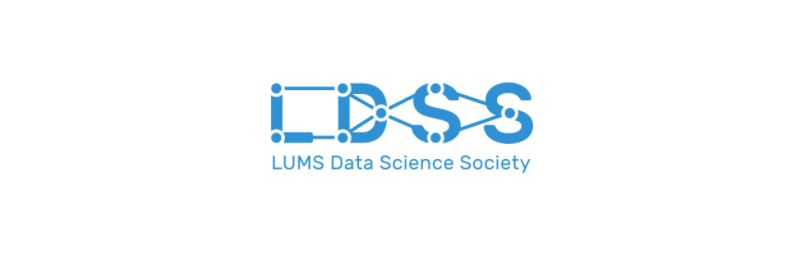
<br> 
The LUMS Data Science Society, in association with Kaggle by Google, brings you the first-ever Kaggle competition in Pakistan.

What is Kaggle Datafest Hackathon
The Kaggle Datafest is designed to test the all-rounded skills of individuals, including, but not limited to, data cleaning, data visualization, and machine learning. The competition Is divided into stages mirroring those of a machine learning project such as exploratory data analysis, data cleaning, and model building in order to provide a holistic experience and to limit the amount of work that is done on the dataset on any one day. Candidates excelling in any of these individual stages or those highlighting innovative ideas will be celebrated during the competition.

As part of our collaboration with Kaggle, we will also conduct three talks during this event on different topics which will serve as learning experiences whose value is immeasurable.

The Main Classification Problem
Candidates are expected to use the provided dataset to predict the price-categories of real estate in Pakistan. There are 4 distinct price-categories: Cheap, Affordable, Semi-Premium, Premium. It is a multi-class supervised classification problem. The model selection is up to the candidates, but skills such as creative feature engineering are fundamental in order to get a higher score

Acknowledgement:<br>
The LDSS team thanks Zameen.com for allowing us to use their data on real estate in Pakistan.


## **Importing Libraries and Dataset**

In [671]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [672]:
# read data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

###**Analyzing Data**

In [673]:
print('Shape of Train Data: ', df_train.shape)
print('Shape of Test Data: ', df_test.shape)

Shape of Train Data:  (3082, 20)
Shape of Test Data:  (545, 19)


In [674]:
df_train.isnull().sum()

Property_Id                                0
Title                                      0
Label                                      0
Type                                       0
Location                                   0
Baths                                      0
Area                                       0
Purpose                                    0
Bedroom(s)                                 0
Description                                0
Main Features                              0
Rooms                                      0
Business and Communication                 0
Healthcare Recreational                    0
Nearby Locations and Other Facilities      0
Other Facilities                           0
Popular                                  984
Source                                     0
Time Stamp                                 0
Price_Category                             0
dtype: int64

In [675]:
df_test.isnull().sum()

Property_Id                                0
Title                                      0
Label                                      0
Type                                       0
Location                                   0
Baths                                      0
Area                                       0
Purpose                                    0
Bedroom(s)                                 0
Description                                0
Main Features                              0
Rooms                                      0
Business and Communication                 0
Healthcare Recreational                    0
Nearby Locations and Other Facilities      0
Other Facilities                           0
Popular                                  176
Source                                     0
Time Stamp                                 0
dtype: int64

In [676]:
# All Nulls are not showing
cols = df_train.columns
# Nulls with white spaces, '-'
print('Nulls in Train Data:\n', df_train.replace(' ',np.NaN).replace('-',np.NaN).isnull().sum())

Nulls in Train Data:
 Property_Id                                 0
Title                                       0
Label                                       0
Type                                        0
Location                                    0
Baths                                     220
Area                                        0
Purpose                                     0
Bedroom(s)                                 91
Description                                 0
Main Features                             854
Rooms                                     540
Business and Communication               1257
Healthcare Recreational                  1425
Nearby Locations and Other Facilities    1246
Other Facilities                         1336
Popular                                   984
Source                                      0
Time Stamp                                  0
Price_Category                              0
dtype: int64


In [677]:
print('Nulls in Test Data:\n', df_test.replace(' ',np.NaN).replace('-',np.NaN).isnull().sum())

Nulls in Test Data:
 Property_Id                                0
Title                                      0
Label                                      0
Type                                       0
Location                                   0
Baths                                     44
Area                                       0
Purpose                                    0
Bedroom(s)                                14
Description                                0
Main Features                            145
Rooms                                     78
Business and Communication               220
Healthcare Recreational                  245
Nearby Locations and Other Facilities    221
Other Facilities                         230
Popular                                  176
Source                                     0
Time Stamp                                 0
dtype: int64


###**Checking Categories**

In [678]:
df_train.groupby('Price_Category')['Property_Id'].count()

Price_Category
Affordable       170
Cheap             18
Premium         1057
Semi-Premium    1837
Name: Property_Id, dtype: int64

Text(0, 0.5, 'Counts of Houses')

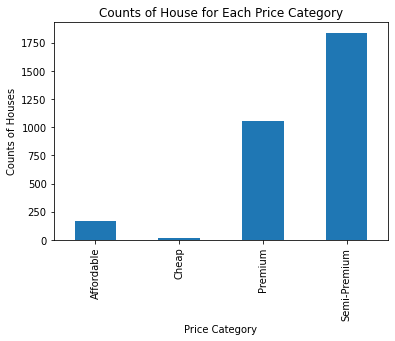

In [679]:
df_train.groupby('Price_Category')['Property_Id'].count().plot.bar()
plt.title('Counts of House for Each Price Category')
plt.xlabel('Price Category')
plt.ylabel('Counts of Houses')

###**Data Preparation**

In [680]:
#useless columns: Property_id, type, purpose, 
#useful columns: ['Area','Baths', 'Bedroom(s)','Loc_Score']
col_useful = ['Area','Baths', 'Bedroom(s)','Loc_Score']

In [681]:
# split the location column into 3
df_location = pd.DataFrame(columns = ['Town', 'City', 'Province'])
df_location[['Town', 'City', 'Province']]= df_train.Location.str.split(",", expand = True)
df_location['Price_Category'] = df_train['Price_Category'] 

df_location1 = pd.DataFrame(columns = ['Town', 'City', 'Province'])
df_location1[['Town', 'City', 'Province']]= df_test.Location.str.split(",", expand = True)

In [682]:
print('Unique Provinces in Train Data:', df_location.Province.unique())
print('Unique Provinces in Test Data:', df_location1.Province.unique())
# 4 labels, one for others as well

Unique Provinces in Train Data: [' Punjab' ' Islamabad Capital' ' Sindh']
Unique Provinces in Test Data: [' Sindh' ' Punjab' ' Islamabad Capital']


In [683]:
print('Unique Cities in Train Data:', df_location.City.unique())
print('Unique Cities in Test Data:', df_location1.City.unique())
# 4 labels, one for others as well

Unique Cities in Train Data: [' Lahore' ' Islamabad' ' Karachi']
Unique Cities in Test Data: [' Karachi' ' Lahore' ' Islamabad']


In [684]:
print('Unique Towns in Train Data:', df_location.Town.unique().shape)
print('Unique Towns in Test Data:', df_location1.Town.unique().shape)
# Group areas

Unique Towns in Train Data: (166,)
Unique Towns in Test Data: (78,)


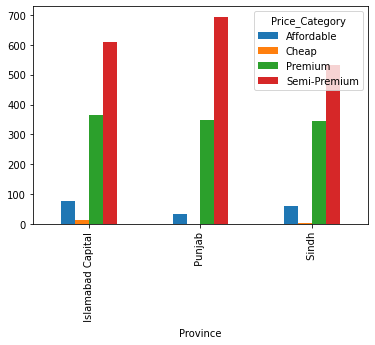

In [685]:
df_location.groupby(['Province','Price_Category'])['Town'].count().unstack('Price_Category').plot(kind='bar')

In [686]:
def map_cat(row):
    if row['Price_Category'] == 'Cheap':
        return 1
    elif row['Price_Category'] == 'Affordable':
        return 2
    elif row['Price_Category'] == 'Semi-Premium':
        return 3
    else: return 4
df_location['Price_Category'] = df_location.apply(lambda row: map_cat(row), axis=1)

In [687]:
temp = df_location.groupby(['Town','Price_Category'])['Province']
weights = {1:1, 2:2, 3:3, 4:4}
town_dict ={}
for name, group in temp:
    if name[0] in town_dict:
        town_dict[name[0]] = town_dict[name[0]] + weights[name[1]]*group.count()
    else:
        town_dict[name[0]]= weights[name[1]]*group.count()
#print(town_dict)
temp = df_location.groupby(['Town'])['Province']

In [688]:
temp1 = df_location.groupby(['Town'])['Province'].count()
for i in town_dict:
    town_dict[i] = town_dict[i]/temp1[i]

In [689]:
min(town_dict.values()), max(town_dict.values())

(1.0, 4.0)

In [690]:
def map_town(row):
    if row['Town'] in town_dict:
        return town_dict[row['Town']]
    else: return 2.5

def map_city(row):
    if row['City'] == ' Islamabad':
        return 1
    if row['City'] == ' Lahore':
        return 2
    else: return 3
df_location['Loc_Score'] = df_location.apply(lambda row: map_town(row), axis=1)
df_location1['Loc_Score'] = df_location1.apply(lambda row: map_town(row), axis=1)

In [691]:
df_train['Loc_Score'] = df_location['Loc_Score']
df_test['Loc_Score'] = df_location1['Loc_Score']
df_train['City'] = df_location.apply(lambda row: map_city(row), axis=1)
df_test['City'] = df_location1.apply(lambda row: map_city(row), axis=1)

In [692]:
def map_area(row):
    a = row['Area'].split(' ')
    if a[1] == 'Kanal':
        return float(a[0].replace(',', ''))*20
    else:
        return float(a[0].replace(',', ''))
df_train['Area'] = df_train.apply(lambda row: map_area(row), axis=1)
df_test['Area'] = df_test.apply(lambda row: map_area(row), axis=1)

In [693]:
df_train['Bed1'] = df_train['Bedroom(s)'].replace('-', np.NaN).astype('float')
df_train['Bath1'] = df_train['Baths'].replace('-', np.NaN).astype('float')
df_test['Bed1'] = df_test['Bedroom(s)'].replace('-', np.NaN).astype('float')
df_test['Bath1'] = df_test['Baths'].replace('-', np.NaN).astype('float')

In [694]:
# Number 1

def Check_Nulls(df_type):
    print("Beds with a - :", df_type[(df_type['Bedroom(s)'] == '-')].shape)
    df_type[(df_type['Bedroom(s)'] == '-') & (df_type['Rooms'] == ' ') ].shape
    print("Beds with a - and data available in Rooms :", df_type[(df_type['Bedroom(s)'] == '-') & (df_type['Rooms'] != ' ') ].shape)

    print("Baths with a - :", df_type[(df_type['Baths'] == '-')].shape)
    df_type[(df_type['Baths'] == '-') & (df_type['Rooms'] == ' ') ]
    print("Baths with a - and data available in Rooms :", df_type[(df_type['Baths'] == '-')  & (df_type['Rooms'] != ' ')].shape)

def Create_list(df_type):
    my_list = []
    for i in range(df_type.shape[0]):
        list_features = df_type['Rooms'][i].split(",")
        my_list.append(list_features)
    return my_list 

# Adding data to some of the bedroom columns. The following two conditions apply:
# Prior Conditions: (df_train['Bedroom(s)'] == '-') & (df_train['Rooms'] != ' ')
# Then if my_list[i][0].strip()[0:9] == 'Bedrooms:' holds, get last element by my_list[i][0].strip()[-1]

def Add_Beds(df_type):
    for i in range(df_type.shape[0]):
        if (df_type.loc[[i], 'Bedroom(s)'][i] == '-') & (df_type.loc[[i], 'Rooms'][i] != ' '):
            if my_list[i][0].strip()[0:9] == 'Bedrooms:':
                num = my_list[i][0].strip()[-1]
                df_type.loc[[i], 'Bedroom(s)' ] = int(num)

# Prior Conditions: (df_train['Baths'] == '-') & (df_train['Rooms'] != ' ')
# First condition is len(my_list[i]) >= 2:
# Then my_list[i][1].strip()[0:10] == "Bathrooms:" 

def Add_Baths(df_type):
    for i in range(df_type.shape[0]):
        if (df_type.loc[[i], 'Baths'][i] == '-') & (df_type.loc[[i], 'Rooms'][i] != ' '):
            if len(my_list[i]) >=2:
                if my_list[i][1].strip()[0:10] == 'Bathrooms:':
                    num = my_list[i][1].strip()[-1]
                    df_type.loc[[i], 'Baths' ] = int(num)


In [695]:
my_list = Create_list(df_train)
Add_Beds(df_train)
Add_Baths(df_train)
Check_Nulls(df_train)

Beds with a - : (61, 24)
Beds with a - and data available in Rooms : (5, 24)
Baths with a - : (176, 24)
Baths with a - and data available in Rooms : (103, 24)


In [696]:
# Number 3
# Extracting possible number of beds and washrooms from Description
def Extract_Desc(df_type, word_list, room):
    for i in range(df_type.shape[0]):
        if (df_type[room][i] == '-'):
            current = df_type['Description'].str.strip().str.lower()[i].split(" ")
            for each in word_list:
                if each in current:
                    y = current.index(each)
                    if y != 0:
                        get_before = y-1
                        val = current[get_before] 
                        try:
                            new_val = int(val)
                            df_type[room][i] = new_val
                        except:
                            pass

bed_list = ['bed', 'beds', 'bedroom', 'bedrooms']
bath_list = ['bath', 'baths', 'bathroom', 'bathrooms', 'wash', 'washroom', 'washrooms']

Extract_Desc(df_train, bath_list, "Baths" )
Extract_Desc(df_train, bed_list, "Bedroom(s)" )
# add here

def Equate_both(df_type):
    for i in range(df_type.shape[0]):
        if (df_type['Bedroom(s)'][i] == '-') & (df_type['Baths'][i] != '-'):
            df_type['Bedroom(s)'][i] = df_type['Baths'][i]

    for i in range(df_type.shape[0]):
        if (df_type['Baths'][i] == '-') & (df_type['Bedroom(s)'][i] != '-'):
            df_type['Baths'][i] = df_type['Bedroom(s)'][i]

#Equate_both(df_train)

In [697]:
from sklearn.impute import KNNImputer

# Number 4 
for i in range(df_train.shape[0]):
    if df_train['Baths'][i] == '-':
        df_train['Baths'][i] = '-1'
for i in range(df_train.shape[0]):
    if df_train['Bedroom(s)'][i] == '-':
        df_train['Bedroom(s)'][i] = '-1'

df_train['Baths'] = df_train['Baths'].astype(int)
df_train['Bedroom(s)'] = df_train['Bedroom(s)'].astype(int)

for i in range(df_train.shape[0]):
    if df_train['Baths'][i] == -1:
        df_train['Baths'][i] = np.nan
for i in range(df_train.shape[0]):
    if df_train['Bedroom(s)'][i] == -1:
        df_train['Bedroom(s)'][i] = np.nan

X = df_train.loc[:, ['Area','Loc_Score', 'Bedroom(s)', 'Baths']]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
sub = imputer.fit_transform(X)

sub_data = pd.DataFrame(sub, columns = ['Area','Loc_Score','Bedroom(s)','Baths'])
df_train.drop(columns=['Area','Loc_Score','Bedroom(s)','Baths'], inplace= True)
df_train = pd.concat([df_train, sub_data], axis=1, join="inner")


In [698]:
# Number 5- Complete for Test 

my_list = Create_list(df_test)
Add_Beds(df_test)
Add_Baths(df_test)
Check_Nulls(df_test)

Extract_Desc(df_test, bath_list, "Baths" )
Extract_Desc(df_test, bed_list, "Bedroom(s)" )

Equate_both(df_test)

for i in range(df_test.shape[0]):
    if df_test['Baths'][i] == '-':
        df_test['Baths'][i] = '-1'
for i in range(df_test.shape[0]):
    if df_test['Bedroom(s)'][i] == '-':
        df_test['Bedroom(s)'][i] = '-1'

df_test['Baths'] = df_test['Baths'].astype(int)
df_test['Bedroom(s)'] = df_test['Bedroom(s)'].astype(int)

for i in range(df_test.shape[0]):
    if df_test['Baths'][i] == -1:
        df_test['Baths'][i] = np.nan
for i in range(df_test.shape[0]):
    if df_test['Bedroom(s)'][i] == -1:
        df_test['Bedroom(s)'][i] = np.nan

X = df_test.loc[:, ['Area','Loc_Score', 'Bedroom(s)', 'Baths']]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
sub = imputer.fit_transform(X)

sub_data = pd.DataFrame(sub, columns = ['Area','Loc_Score','Bedroom(s)','Baths'])
df_test.drop(columns=['Area','Loc_Score','Bedroom(s)','Baths'], inplace= True)
df_test = pd.concat([df_test, sub_data], axis=1, join="inner")

print(df_test['Baths'].isnull().sum())
print(df_test['Bedroom(s)'].isnull().sum())
df_test.info()

Beds with a - : (9, 23)
Beds with a - and data available in Rooms : (0, 23)
Baths with a - : (37, 23)
Baths with a - and data available in Rooms : (25, 23)
0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Property_Id                            545 non-null    int64  
 1   Title                                  545 non-null    object 
 2   Label                                  545 non-null    object 
 3   Type                                   545 non-null    object 
 4   Location                               545 non-null    object 
 5   Purpose                                545 non-null    object 
 6   Description                            545 non-null    object 
 7   Main Features                          545 non-null    object 
 8   Rooms                                  545 non-nul

There are  4  classes in the dataset


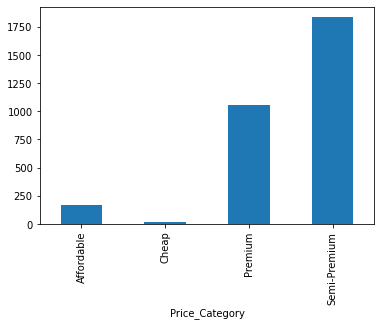

In [699]:
print('There are ', df_train.Price_Category.unique().shape[0], ' classes in the dataset')
df_train.groupby(['Price_Category'])['Area'].count().plot(kind = 'bar')

In [700]:
# Analyze if other Facilities is a good metric for price
def map_f1(row):
    f1 = 0
    if 'maintenance' in row['Other Facilities'].lower():
        f1 = 1
    return f1

def map_f2(row):
    f2 = 0
    if 'security' in row['Other Facilities'].lower():
        f2 = 1
    return f2

df_train['f1'] = df_train.apply(lambda row: map_f1(row), axis=1)
df_train['f2'] = df_train.apply(lambda row: map_f2(row), axis=1)    
df_test['f1'] = df_test.apply(lambda row: map_f1(row), axis=1)
df_test['f2'] = df_test.apply(lambda row: map_f2(row), axis=1)    

Text(0.5, 1.0, 'Proportion of Houses by Category and F1')

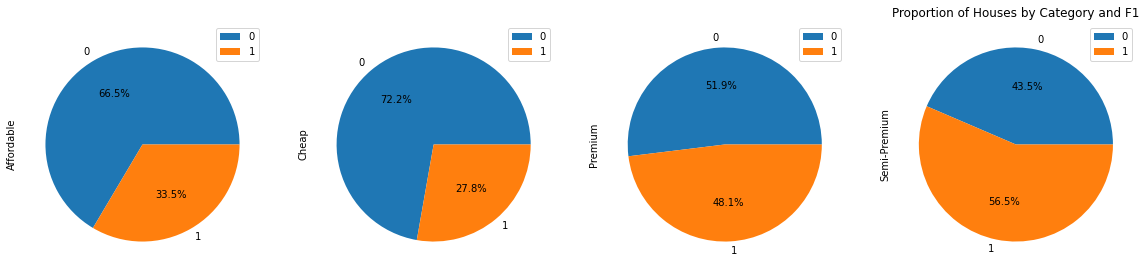

In [701]:
df_train.groupby(['Price_Category','f1'])['Property_Id'].count().unstack('Price_Category').plot(kind = 'pie', subplots= True, figsize= (20,10), autopct='%1.1f%%')
plt.title('Proportion of Houses by Category and F1')

Text(0.5, 1.0, 'Proportion of Houses by Category and F2')

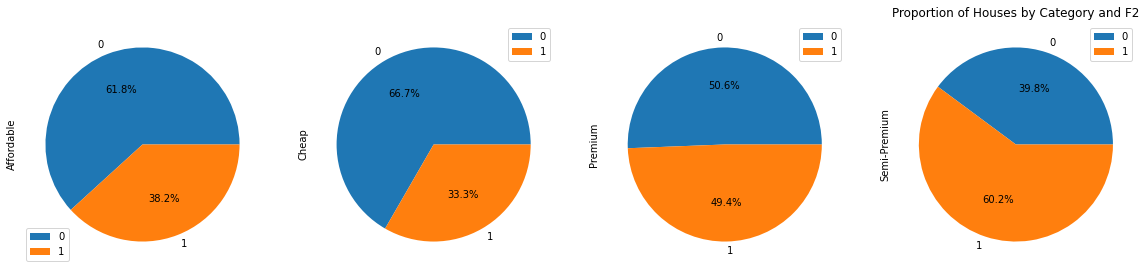

In [702]:
df_train.groupby(['Price_Category','f2'])['Property_Id'].count().unstack('Price_Category').plot(kind = 'pie', subplots= True, figsize= (20,10), autopct='%1.1f%%')
plt.title('Proportion of Houses by Category and F2')

In [703]:
def map_pop(row):
    if row['Popular'] == np.NaN:
        return 0
    if row['Popular']== 'hot':
        return 1
    else:
        return 2

df_train['pop'] = df_train.apply(lambda row: map_pop(row), axis=1)
df_test['pop'] = df_test.apply(lambda row: map_pop(row), axis=1)

In [704]:
import re
df_train['Rooms'] = df_train['Rooms'].fillna(value = '0')
df_test['Rooms'] = df_test['Rooms'].fillna(value = '0')

def map_room(row):
    if len(row['Rooms']) < 2:
        return (row['Bedroom(s)'] + row['Baths'])
        #return 0
        
    #s = df_train['Rooms'].str.strip()
    a = re.split(',|:',  row['Rooms'])
    x = 0
    for i in a:
        try:
            x = x + int(i)
        except:
            pass

    return (x)

df_train['Rooms'] = df_train.apply(lambda row: map_room(row), axis=1)

df_test['Rooms'] = df_test.apply(lambda row: map_room(row), axis=1)

In [705]:
#cols = ['Baths', 'Bedroom(s)', 'Loc_Score', 'Area','City', 'Price_Category']
df_train['s'] = df_train['Area']**(1.5 *df_train['Bedroom(s)'])
df_train['s1'] = df_train['Rooms']*(df_train['Area'])
df_test['s'] = df_test['Area']**(1.5 *df_test['Bedroom(s)'])
df_test['s1'] = df_test['Rooms']*(df_test['Area'])
cols = ['Rooms', 'Loc_Score', 'Area','City', 's','s1', 'Price_Category']
df_train[cols].head()

,Rooms,Loc_Score,Area,City,s,s1,Price_Category
0,17.0,3.148418,20.0,2,5.724334e+09,340.0,Semi-Premium
1,10.0,3.000000,24.0,1,2.246903e+10,240.0,Semi-Premium
2,14.0,3.565313,20.0,2,5.120000e+11,280.0,Premium
3,7.0,2.891960,9.4,3,2.393731e+04,65.8,Semi-Premium
4,6.0,2.913043,5.0,1,1.397542e+03,30.0,Affordable


In [706]:
df_train.groupby(['Price_Category'])['Area'].min()
df_train = df_train[df_train['Area'] > 2]

In [707]:
df_train.groupby(['Price_Category'])['s1'].max()

Price_Category
Affordable        80.0
Cheap             50.4
Premium         3900.0
Semi-Premium    2000.0
Name: s1, dtype: float64

### **Analyzing Correlation**

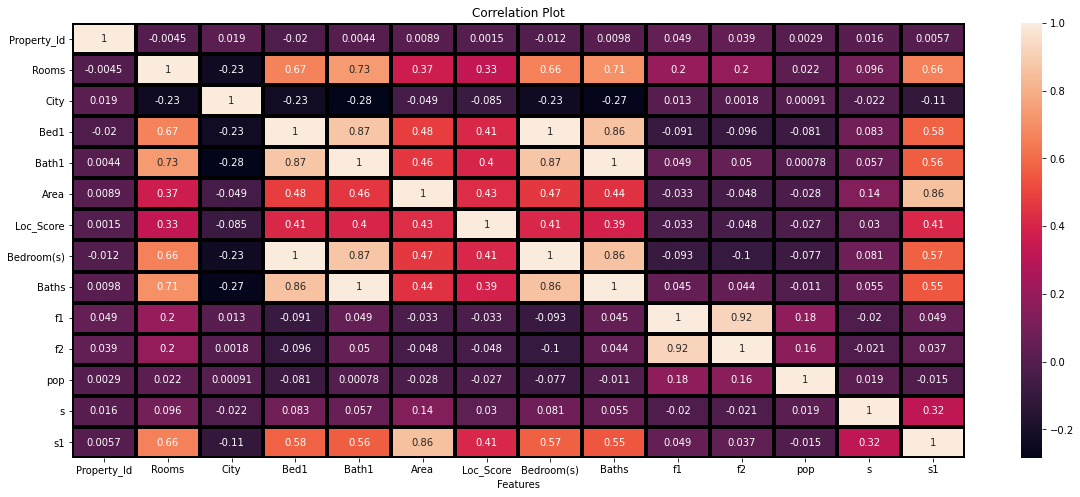

In [708]:
corr_mat = df_train.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr_mat, annot = True, linewidths=3, linecolor='black')
plt.title('Correlation Plot')
plt.xlabel('Features')
plt.show()

##**Creating Machine Learning Models**

In [709]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, multilabel_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
#train_features = df_train[cols].replace(' ',np.NaN).replace('-',np.NaN)
#train_features = train_features.dropna()
df_train = df_train[df_train['Property_Id']!=443]
df_train = df_train[df_train['Property_Id']!=1120]
cols = ['Rooms', 'Loc_Score', 'Area','City', 's','s1', 'Price_Category']
train_features = df_train[cols]
Score_dictionary ={}

#train_features = train_features[train_features['Area']>=1]
y= train_features.apply(lambda row: map_cat(row), axis=1)
train_features, test_features, train_labels, test_labels = train_test_split(train_features[cols[:-1]], y,test_size=0.15)

###**OneVsRestClassifier**

In [710]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
clf = OneVsRestClassifier(XGBClassifier(subsample = 0.3))

#mlb = MultiLabelBinarizer()
#train_labels = mlb.fit_transform(train_labels)

clf.fit(train_features, train_labels)

predictions = clf.predict(test_features)
predictions1 = clf.predict(train_features)
print("Train Accuracy: ", accuracy_score(train_labels, predictions1)*100)
print("Test Accuracy: ", accuracy_score(test_labels, predictions)*100)
print("F1 Score     : ", f1_score(test_labels, predictions, average='weighted'))
print("Precision    : ", precision_score(test_labels, predictions,average='weighted'))
print("Recall       : ", recall_score(test_labels, predictions, average='weighted'))

Score_dictionary['OneVsRestClassifier'] = [accuracy_score(train_labels, predictions1)*100, accuracy_score(test_labels, predictions)*100,
                                           f1_score(test_labels, predictions, average='weighted'),precision_score(test_labels, predictions,average='weighted'),
                                           recall_score(test_labels, predictions, average='weighted') ]

Train Accuracy:  91.99846860643184
Test Accuracy:  87.85249457700651
F1 Score     :  0.8758104266261164
Precision    :  0.8770880613926313
Recall       :  0.8785249457700651


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###**RandomForestClassifier**

Train Accuracy:  93.52986217457887
Test Accuracy:  88.28633405639913
F1 Score     :  0.8801608537788995
Precision    :  0.881730974804677
Recall       :  0.8828633405639913


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,2,3,4,All
True,,,,
2,0,3,0,3
3,1,26,16,43
4,3,20,11,34
All,4,49,27,80


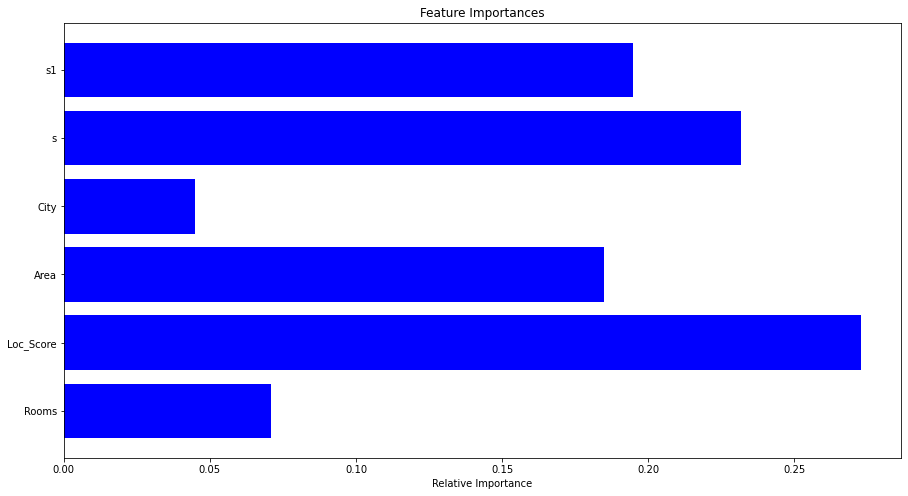

In [711]:
import matplotlib.pyplot as plt
clf = RandomForestClassifier(n_estimators=100, max_depth=8, oob_score=True, class_weight = {1: 10, 2: 5, 3:1, 4:1})

clf.fit(train_features, train_labels)

predictions = clf.predict(test_features)
predictions1 = clf.predict(train_features)
print("Train Accuracy: ", accuracy_score(train_labels, predictions1)*100)
print("Test Accuracy: ", accuracy_score(test_labels, predictions)*100)
print("F1 Score     : ", f1_score(test_labels, predictions, average='weighted'))
print("Precision    : ", precision_score(test_labels, predictions,average='weighted'))
print("Recall       : ", recall_score(test_labels, predictions, average='weighted'))
#print(multilabel_confusion_matrix(test_labels, predictions))
indices = clf.feature_importances_
plt.figure(figsize=(15,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), indices, color='b', align='center')
plt.yticks(range(len(indices)), cols[:-1])
plt.xlabel('Relative Importance');

Score_dictionary['RandomForestClassifier'] = [accuracy_score(train_labels, predictions1)*100, accuracy_score(test_labels, predictions)*100,
                                           f1_score(test_labels, predictions, average='weighted'),precision_score(test_labels, predictions,average='weighted'),
                                           recall_score(test_labels, predictions, average='weighted') ]

y_true = pd.Series(test_labels)
y_pred = pd.Series(predictions)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


###**Counting Predictions**

In [712]:
preds = clf.predict(df_test[cols[:-1]])

In [713]:
from collections import Counter
Counter(preds)

Counter({1: 1, 2: 24, 3: 308, 4: 212})

###**KNN Classifier**

Minimum error:  0.1551 at K = 7


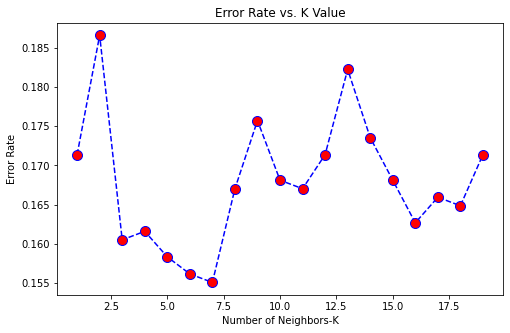

In [714]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, multilabel_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

#train_features = df_train[cols].replace(' ',np.NaN).replace('-',np.NaN)
#train_features = train_features.dropna()
train_features = df_train[cols]
# scaler = StandardScaler()
# train_features = scaler.fit_transform(train_features)

y = train_features.apply(lambda row: map_cat(row), axis=1)
train_features, test_features, train_labels, test_labels = train_test_split(train_features[cols[:-1]], y,
                                                                                test_size=0.30, stratify=y)

error_rate = []

for i in range(1,20): 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(train_features, train_labels)
 y_pred = knn.predict(test_features)
 error_rate.append(np.mean(y_pred != test_labels))

plt.figure(figsize=(8,5))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors-K')
plt.ylabel('Error Rate')
min_val = 1+error_rate.index(min(error_rate))
print("Minimum error: ",np.around(min(error_rate),decimals=5),"at K =",min_val)

Train Accuracy:  85.63458856345886
Test Accuracy:  84.49023861171366
F1 Score     :  0.8399203052312181
Precision    :  0.8396265305333241
Recall       :  0.8449023861171366


Predicted,2,3,4,All
True,,,,
1,0,2,0,2
2,1,11,5,17
3,5,116,67,188
4,4,46,40,90
All,10,175,112,297


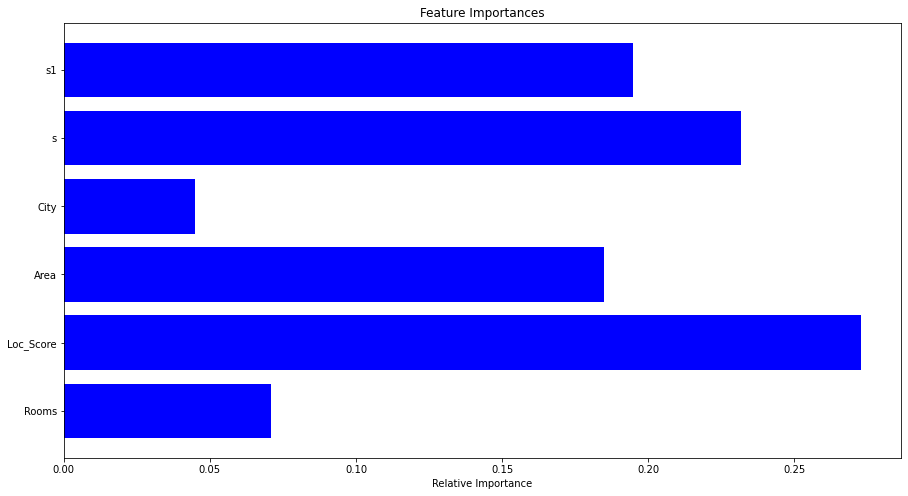

In [715]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=min_val)

#Train the model using the training sets
knn.fit(train_features, train_labels)

predictions = knn.predict(test_features)
predictions1 = knn.predict(train_features)
print("Train Accuracy: ", accuracy_score(train_labels, predictions1)*100)
print("Test Accuracy: ", accuracy_score(test_labels, predictions)*100)
print("F1 Score     : ", f1_score(test_labels, predictions, average='weighted'))
print("Precision    : ", precision_score(test_labels, predictions,average='weighted'))
print("Recall       : ", recall_score(test_labels, predictions, average='weighted'))
#print(multilabel_confusion_matrix(test_labels, predictions))
indices = clf.feature_importances_
plt.figure(figsize=(15,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), indices, color='b', align='center')
plt.yticks(range(len(indices)), cols[:-1])
plt.xlabel('Relative Importance');

Score_dictionary['KNeighborsClassifier'] = [accuracy_score(train_labels, predictions1)*100, accuracy_score(test_labels, predictions)*100,
                                           f1_score(test_labels, predictions, average='weighted'),precision_score(test_labels, predictions,average='weighted'),
                                           recall_score(test_labels, predictions, average='weighted') ]

y_true = pd.Series(test_labels)
y_pred = pd.Series(predictions)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

###**Second Phase of Experiment**

In [716]:
df_train['pop'] = df_train['Loc_Score'] * df_train['pop'] 
cols = [ 'Rooms', 'Loc_Score', 'Area','City','pop' ,'s1', 's','Price_Category']
train_features = df_train[cols]
y1 = train_features[train_features['Price_Category']=='Cheap'].apply(lambda row: map_cat(row), axis=1)
train1, test1, trlabels1, telabel1 = train_test_split(train_features[train_features['Price_Category']== 'Cheap'][cols[:-1]], y1,
                                                                                test_size=0.30)

In [717]:
y1 = train_features[train_features['Price_Category']== 'Affordable'].apply(lambda row: map_cat(row), axis=1)
train2, test2, trlabels2, telabel2 = train_test_split(train_features[train_features['Price_Category']== 'Affordable'][cols[:-1]], y1,
                                                                                test_size=0.20)

In [718]:
y1 = train_features[train_features['Price_Category']== 'Semi-Premium'].apply(lambda row: map_cat(row), axis=1)
#discard 40 percent data
#train3, test3, trlabels3, telabel3 = train_test_split(train_features[train_features['Price_Category']== 'Semi-Premium'][cols[:-1]], y1,
#                                                                                test_size=0.50)
train3, test3, trlabels3, telabel3 = train_test_split(train_features[train_features['Price_Category']== 'Semi-Premium'][cols[:-1]], y1, test_size=0.10)

In [719]:
y1 = train_features[train_features['Price_Category']== 'Premium'].apply(lambda row: map_cat(row), axis=1)
#train4, test4, trlabels4, telabel4 = train_test_split(train_features[train_features['Price_Category']== 'Premium'][cols[:-1]], y1,
#                                                                                test_size=0.50)
train4, test4, trlabels4, telabel4 = train_test_split(train_features[train_features['Price_Category']== 'Premium'][cols[:-1]], y1, test_size=0.10)

In [720]:
df1 = pd.DataFrame(columns = train1.columns)
df1 = df1.append(train1, ignore_index = True)
df1 = df1.append(train2, ignore_index = True)
df1 = df1.append(train3, ignore_index = True)
df1 = df1.append(train4, ignore_index = True)

In [721]:
df2 = pd.DataFrame(columns = train1.columns)
df2 = df2.append(test1, ignore_index = True)
df2 = df2.append(test2, ignore_index = True)
df2 = df2.append(test3, ignore_index = True)
df2 = df2.append(test4, ignore_index = True)

In [722]:
train_m = trlabels1
train_m = train_m.append(trlabels2)
train_m = train_m.append(trlabels3)
train_m = train_m.append(trlabels4)

In [723]:
test_m = telabel1
test_m = test_m.append(telabel2)
test_m = test_m.append(telabel3)
test_m = test_m.append(telabel4)

In [724]:
df1['labels'] = list(train_m)
df2['labels'] = list(test_m)

In [725]:
from sklearn.utils import shuffle
df1 = shuffle(df1)
df2 = shuffle(df2)

###**Second Attempt at Random Forest**

Train Accuracy:  93.87755102040816
Test Accuracy:  89.36170212765957
F1 Score     :  0.885291327778101
Precision    :  0.8885752882713368
Recall       :  0.8936170212765957


Predicted,1,2,3,4,All
True,,,,,
1,0,0,4,1,5
2,1,1,21,11,34
3,1,15,104,64,184
4,0,5,60,41,106
All,2,21,189,117,329


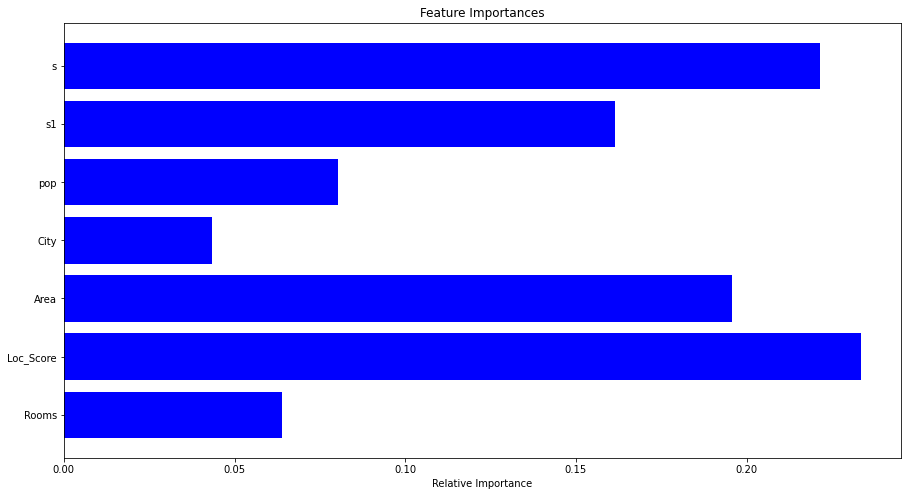

In [726]:
# Random Forest
import matplotlib.pyplot as plt
clf = RandomForestClassifier(n_estimators=100, max_depth=9, oob_score=True, class_weight = {1: 10, 2: 5, 3:1, 4:1})

clf.fit(df1[cols[:-1]], df1['labels'])

predictions = clf.predict(df2[cols[:-1]])
predictions1 = clf.predict(df1[cols[:-1]])
print("Train Accuracy: ", accuracy_score(df1['labels'], predictions1)*100)
print("Test Accuracy: ", accuracy_score(df2['labels'], predictions)*100)
print("F1 Score     : ", f1_score(df2['labels'], predictions, average='weighted'))
print("Precision    : ", precision_score(df2['labels'], predictions,average='weighted'))
print("Recall       : ", recall_score(df2['labels'], predictions, average='weighted'))
#print(multilabel_confusion_matrix(test_labels, predictions))
indices = clf.feature_importances_
plt.figure(figsize=(15,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), indices, color='b', align='center')
plt.yticks(range(len(indices)), cols[:-1])
plt.xlabel('Relative Importance');

y_true = pd.Series(df2['labels'])
y_pred = pd.Series(predictions)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

###**Data Augmentation using SMOTE**

In [727]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [728]:
oversample = SMOTE()
X= df1[cols[:-1]]
y = df1['labels']

counter = Counter(y)
print(counter)

over = SMOTE(sampling_strategy={1: 40, 2:136 , 3:1652,4:947})
#under = RandomUnderSampler()
#steps = [('o', over), ('u', under)]
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x, y = pipeline.fit_resample(X, y)

counter = Counter(y)
print(counter)
print(x.shape[0]/4)

Counter({3: 1652, 4: 947, 2: 134, 1: 11})
Counter({3: 1652, 4: 947, 2: 136, 1: 40})
693.75


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [729]:
import matplotlib.pyplot as plt
clf = RandomForestClassifier(n_estimators=100, max_depth=10, oob_score=True)

clf.fit(x, y)

predictions = clf.predict(df2[cols[:-1]])
predictions1 = clf.predict(x)
print("Train Accuracy: ", accuracy_score(y, predictions1)*100)
print("Test Accuracy: ", accuracy_score(df2['labels'], predictions)*100)
print("F1 Score     : ", f1_score(df2['labels'], predictions, average='weighted'))
print("Precision    : ", precision_score(df2['labels'], predictions,average='weighted'))
print("Recall       : ", recall_score(df2['labels'], predictions, average='weighted'))

Score_dictionary['RandomForestClassifier using Augmentation'] = [accuracy_score(y, predictions1)*100, accuracy_score(df2['labels'], predictions)*100,
                                           f1_score(df2['labels'], predictions, average='weighted'),precision_score(df2['labels'], predictions,average='weighted'),
                                           recall_score(df2['labels'], predictions, average='weighted') ]
y_true = pd.Series(df2['labels'])
y_pred = pd.Series(predictions)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Train Accuracy:  94.45045045045045
Test Accuracy:  89.96960486322189
F1 Score     :  0.8937294245179102
Precision    :  0.8984887221357213
Recall       :  0.8996960486322189


Predicted,1,2,3,4,All
True,,,,,
1,0,0,4,1,5
2,1,1,22,10,34
3,2,15,103,64,184
4,0,5,61,40,106
All,3,21,190,115,329


####**Performance Analysis**

In [730]:
for keys, val in Score_dictionary.items():
  print(keys)
  print("Train Accuracy:", val[0],"%")
  print("Test Accuracy:", val[1],"%")
  print("F1 Score:", val[2])
  print("Precision:", val[3])
  print("Recall:", val[4])
  print("\n")

OneVsRestClassifier
Train Accuracy: 91.99846860643184 %
Test Accuracy: 87.85249457700651 %
F1 Score: 0.8758104266261164
Precision: 0.8770880613926313
Recall: 0.8785249457700651


RandomForestClassifier
Train Accuracy: 93.52986217457887 %
Test Accuracy: 88.28633405639913 %
F1 Score: 0.8801608537788995
Precision: 0.881730974804677
Recall: 0.8828633405639913


KNeighborsClassifier
Train Accuracy: 85.63458856345886 %
Test Accuracy: 84.49023861171366 %
F1 Score: 0.8399203052312181
Precision: 0.8396265305333241
Recall: 0.8449023861171366


RandomForestClassifier using Augmentation
Train Accuracy: 94.45045045045045 %
Test Accuracy: 89.96960486322189 %
F1 Score: 0.8937294245179102
Precision: 0.8984887221357213
Recall: 0.8996960486322189


